In [5]:
## Load Packages
import pandas as pd
import numpy as np

In [6]:
# Load Data Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Text Cleaning
import neattext.functions as nfx

In [8]:
# Load Dataset
df = pd.read_csv("emotion_dataset_2.csv")

C:\Users\Arjun Kumar\AppData\Local\Temp\ipykernel_23392\518975607.py:2: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("emotion_dataset_2.csv")


In [10]:
# Preview Dataset
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,0,neutral,Why ?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Shape
df.shape

(34793, 18)

In [12]:
# Datatypes
df.dtypes

Unnamed: 0      int64
Emotion        object
Text           object
Clean_Text     object
Unnamed: 4     object
Unnamed: 5     object
Unnamed: 6     object
Unnamed: 7     object
Unnamed: 8     object
Unnamed: 9     object
Unnamed: 10    object
Unnamed: 11    object
Unnamed: 12    object
Unnamed: 13    object
Unnamed: 14    object
Unnamed: 15    object
Unnamed: 16    object
Unnamed: 17    object
dtype: object

In [13]:
# Check for Missing Values
df.isnull().sum()

Unnamed: 0         0
Emotion            0
Text               3
Clean_Text       477
Unnamed: 4     33077
Unnamed: 5     34072
Unnamed: 6     34655
Unnamed: 7     34724
Unnamed: 8     34769
Unnamed: 9     34775
Unnamed: 10    34787
Unnamed: 11    34787
Unnamed: 12    34790
Unnamed: 13    34791
Unnamed: 14    34792
Unnamed: 15    34792
Unnamed: 16    34792
Unnamed: 17    34792
dtype: int64

In [14]:
# Value Counts of Emotions
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4298
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion'>

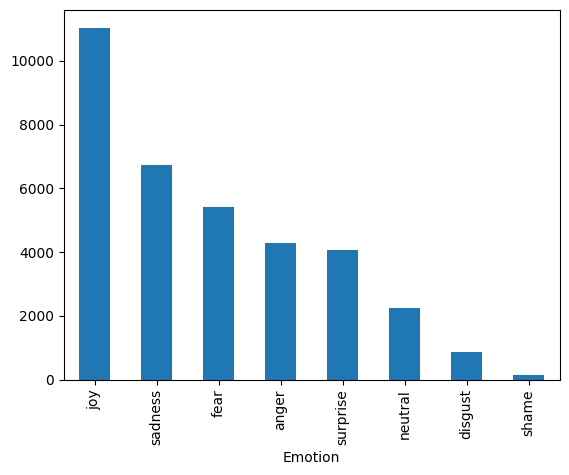

In [15]:
# Value Counts of Emotions as Plotted
df['Emotion'].value_counts().plot(kind='bar')

<Axes: xlabel='count', ylabel='Emotion'>

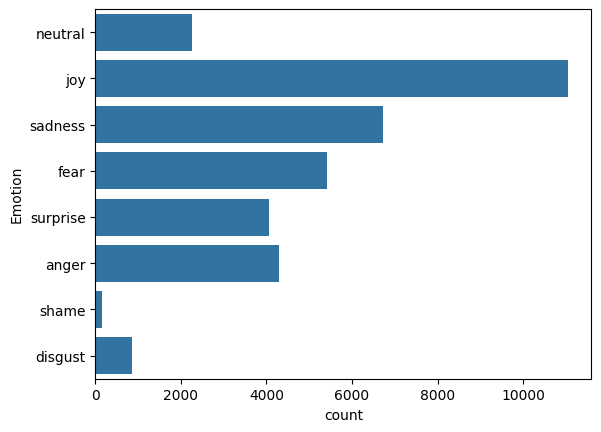

In [16]:
# Using Seaborn to Plot(Old Method)
sns.countplot(df['Emotion'])

<Axes: xlabel='Emotion', ylabel='count'>

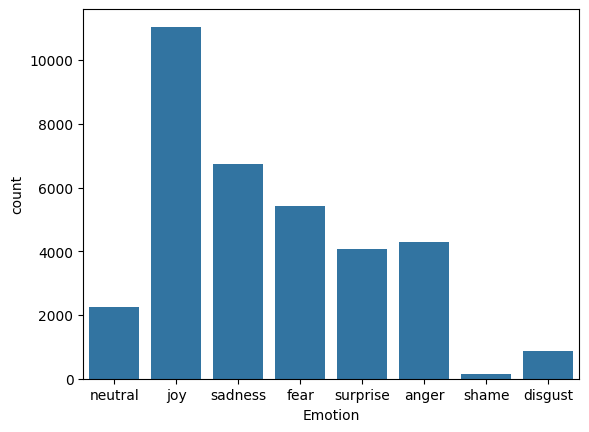

In [17]:
# Using Seaborn to Plot(New Method)
sns.countplot(x='Emotion',data=df)

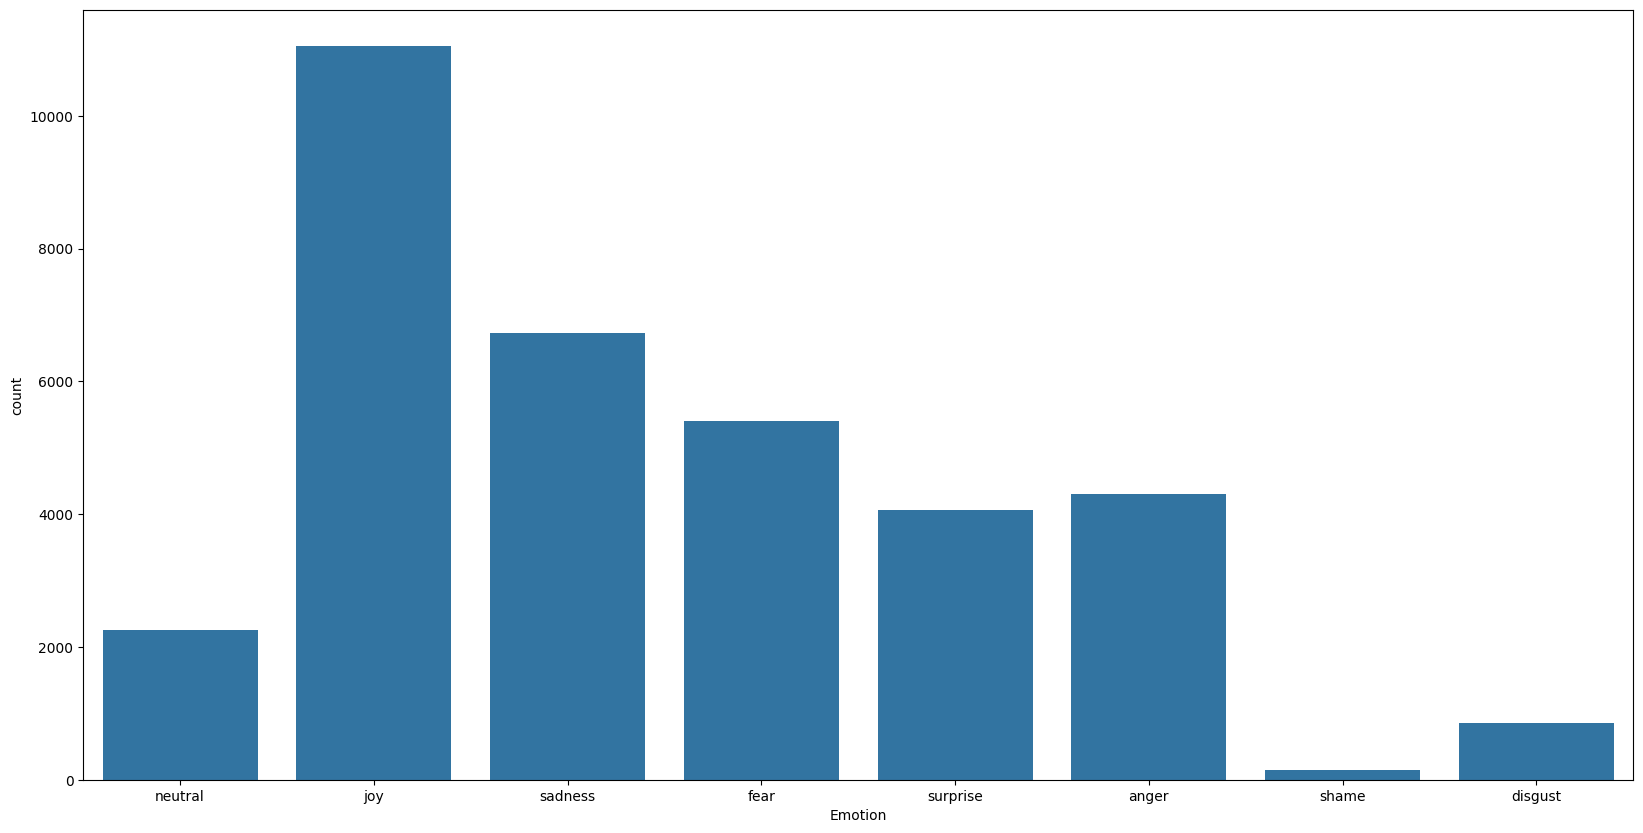

In [18]:
# Using Seaborn to Plot(New Method) for Plotting in a Bigger Format
plt.figure(figsize=(20,10))
sns.countplot(x='Emotion',data=df)
plt.show()

### Exploration
+ Sentiment Analysis
+ Keyword Extraction
    - Keywords for each emotion
    - Wordcloud 

In [19]:
# Sentiment Analysis
from textblob import TextBlob

In [20]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = "Positive"
    elif sentiment < 0:
        result = "Negative"
    else:
        result = "Neutral"
    return result

In [21]:
# Testing the above Function
get_sentiment("I hate cookies")

'Negative'

In [22]:
# Applying the Above Function into the Entire Dataset new column
df['Sentiment'] = df['Text'].apply(get_sentiment)

TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'float'>

In [ ]:
df.head()

In [ ]:
# Compare our Emotion vs Sentiment(To See How Many Percentage of Emotions are Neutral, Negative and Positive)
df.groupby(['Emotion', 'Sentiment']).size()

In [ ]:
# For Ploting
# First Method: Using Matplotlib
#Compare our Emotion vs Sentiment
df.groupby(['Emotion', 'Sentiment']).size().plot(kind='bar')

In [ ]:
# Second Method: Using Seaborn(factorplot have been removed in Newer Versions of Seaborn)
# Catplot identify size as height in newer versions of Seaborn
sns.catplot

In [23]:
sns.catplot(x='Emotion', hue='Sentiment', data=df, kind='count', height=6, aspect=1.5)

ValueError: Could not interpret value `Sentiment` for `hue`. An entry with this name does not appear in `data`.

### Text Cleaning
+ Remove Noise
    - stopwords
    - special characters
    - punctuations
    - emojis

In [121]:
# Neat test is used for Identifying Noises before Text Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [122]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_stopwords)

In [123]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_userhandles)

In [124]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

In [125]:
# Comapring with Text and Clean_Text
df[['Text', 'Clean_Text']]

,Text,Clean_Text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


### Keyword Extraction
+ Extract most commonest words per class of emotion

In [126]:
from collections import Counter

In [127]:
def extract_keywords(text, num=50):
    tokens = [ tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [128]:
# List of emotions
emotion_list = df['Emotion'].unique().tolist()

In [129]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [130]:
joy_list = df[df['Emotion'] == 'joy']['Clean_Text'].tolist()

In [131]:
#Joy Document
joy_docx = ' '.join(joy_list)

In [132]:
joy_docx

'Sage Act upgrade list tommorow eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness    ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang life  Leopold truly happy : hopes prayers beloved son come fruition  feeling fail french #fuckfrench GoodLet   fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile terribly ecstatic dangerous thing  selected study university Yeah  ’ ages   passed BA exams class results heard selected fot year university Zambia form Chikola secondary school Welp time study days Heading campus rain grad photos feeling awesome    brings  Ive bought Christmas presents trawl loads shops :) shit pants Pure 100% gravy life  Leopold truly happy : hopes prayers beloved son come fruition  Class jamming

In [133]:
# Extract Keywords
keyword_joy = extract_keywords(joy_docx)

In [134]:
keyword_joy

{'day': 729,
 'amp': 678,
 'time': 602,
 'Im': 555,
 'work': 509,
 'like': 476,
 'today': 471,
 'tomorrow': 467,
 'Christmas': 453,
 'love': 393,
 'happy': 368,
 'good': 345,
 'night': 332,
 'got': 328,
 ':)': 311,
 'going': 304,
 'home': 302,
 'school': 297,
 'morning': 288,
 '2': 262,
 'joy': 257,
 'life': 251,
 'hours': 251,
 'week': 231,
 'feel': 227,
 'year': 225,
 'days': 208,
 'tonight': 205,
 'long': 204,
 'people': 201,
 'me': 196,
 'great': 194,
 'sleep': 185,
 'new': 181,
 'family': 181,
 's': 180,
 'God': 177,
 'know': 177,
 'hour': 172,
 'friend': 169,
 'felt': 167,
 'cant': 165,
 'it': 162,
 'feeling': 159,
 'RT': 159,
 'friends': 155,
 'think': 148,
 'excited': 145,
 'right': 142,
 'class': 141}

In [135]:
# PLot for Joy keyword
def plot_most_common_words(mydict, emotion_name):
    df_01 = pd.DataFrame(mydict.items(), columns=['token','count'])
    plt.figure(figsize=(20, 10))
    plt.title("Plot of {}".format(emotion_name))
    sns.barplot(x='token', y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()

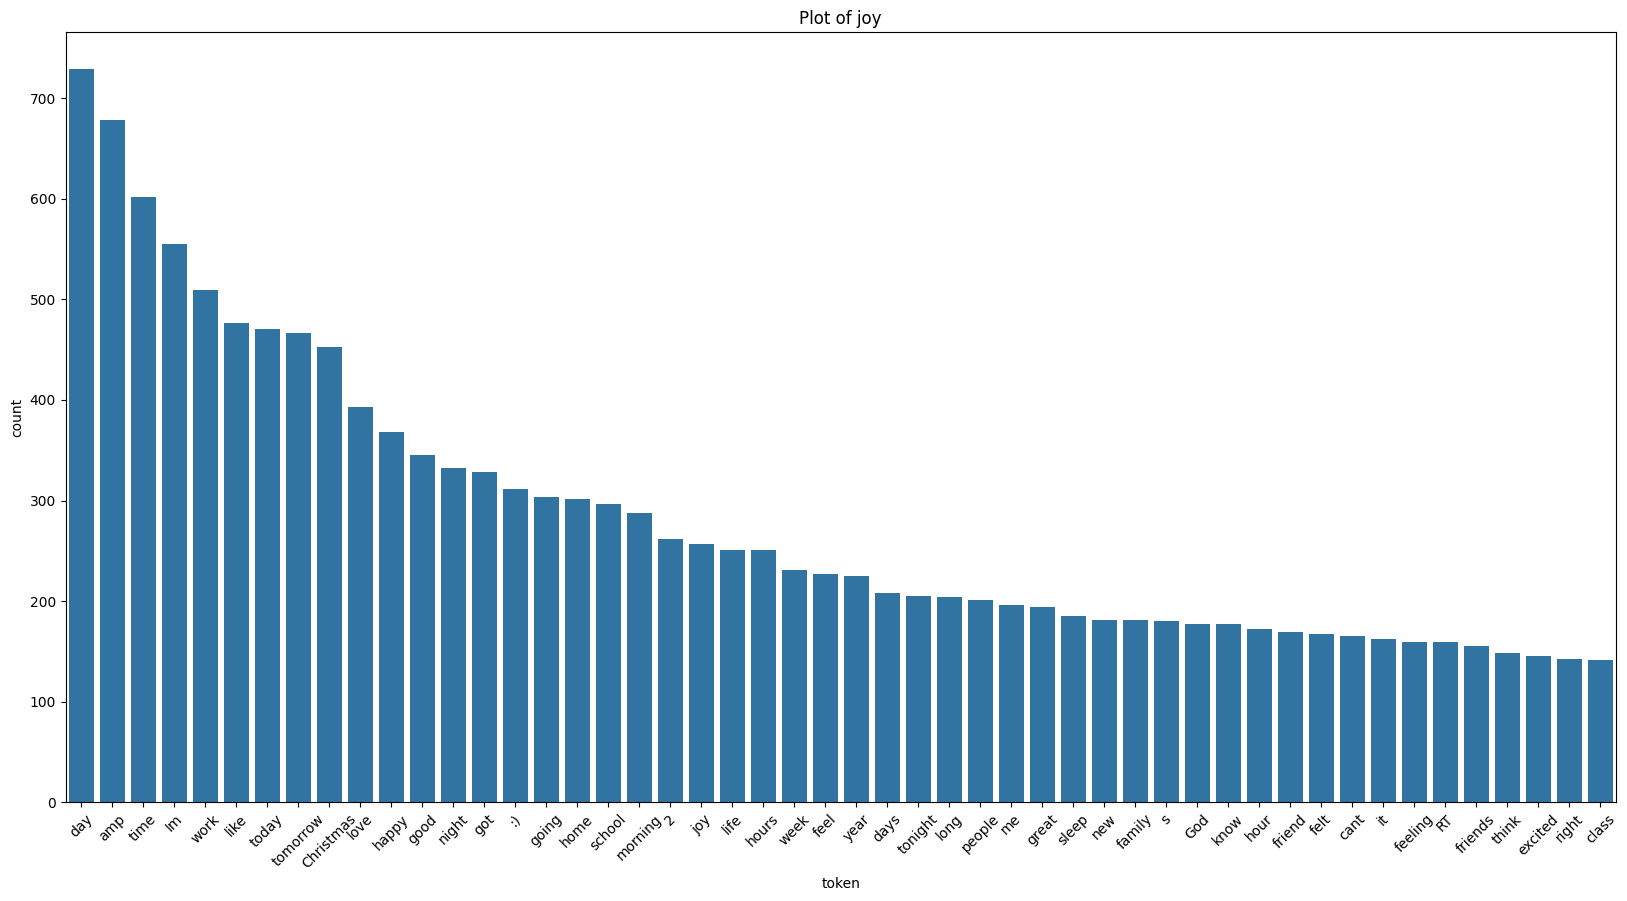

In [136]:
plot_most_common_words(keyword_joy,"joy")

In [137]:
# Plot for Surprise Keyword
surprise_list = df[df['Emotion'] == 'surprise']['Clean_Text'].tolist()
# Document
surprise_docx = ' '.join(surprise_list)
# Extract Keywords
keyword_surprise = extract_keywords(surprise_docx)

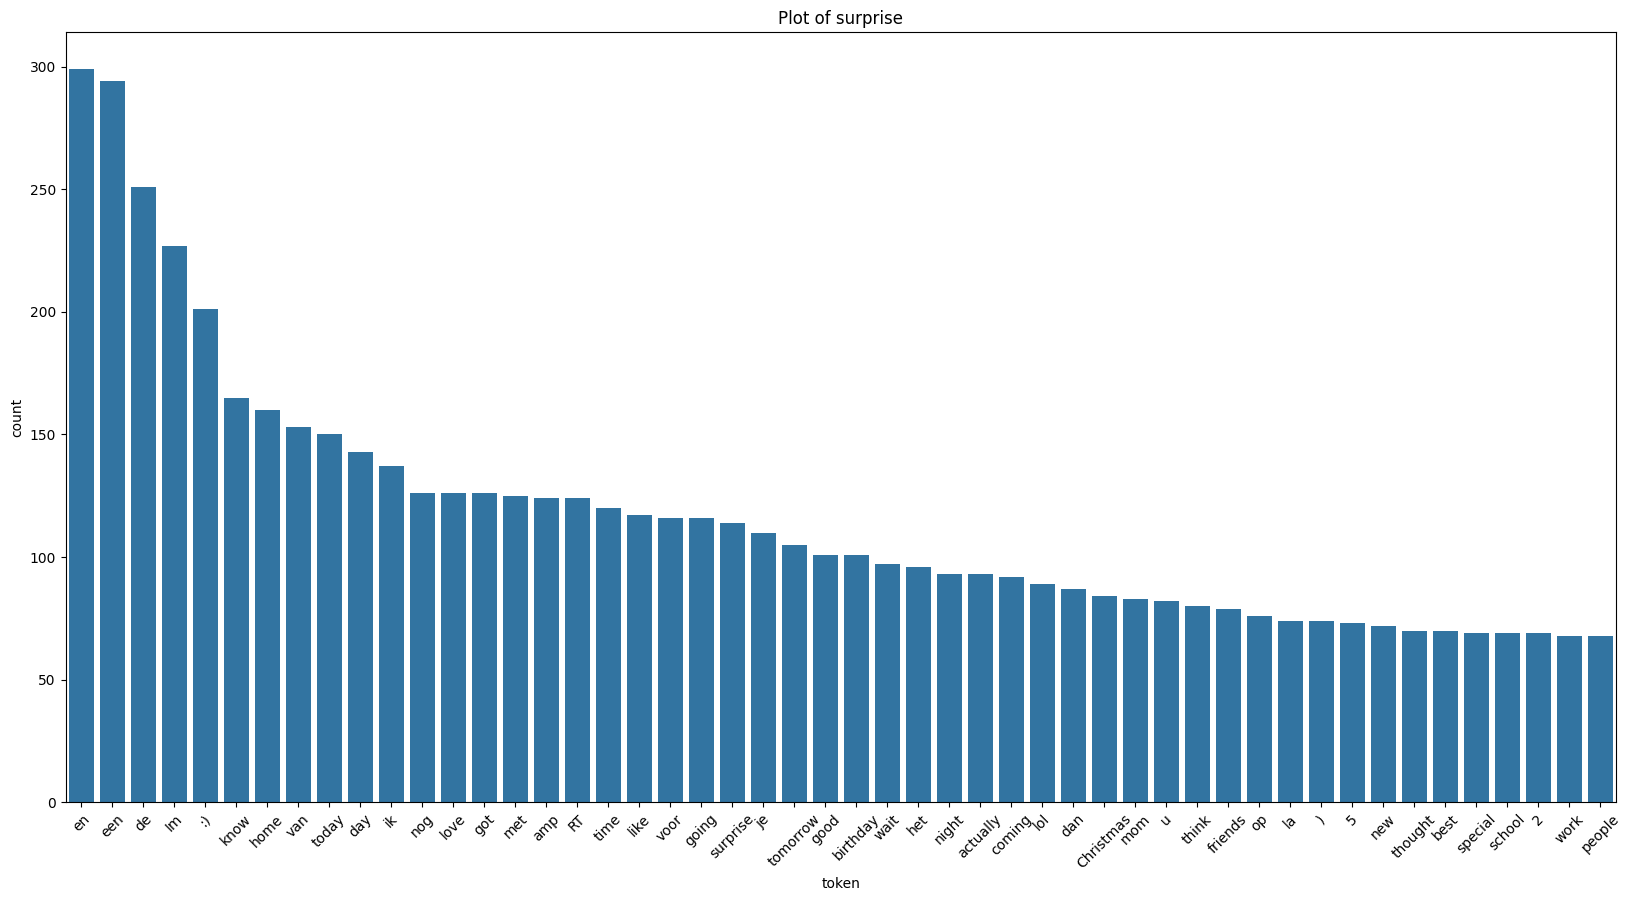

In [138]:
plot_most_common_words(keyword_surprise,"surprise")

In [139]:
# Another Plot Method
### Word Cloud
from wordcloud import WordCloud

In [140]:
def plot_wordcloud(docx):
    mywordcloud = WordCloud().generate(docx)
    plt.figure(figsize=(20, 10))
    plt.imshow(mywordcloud,interpolation= 'bilinear')
    plt.axis('off')
    plt.show()

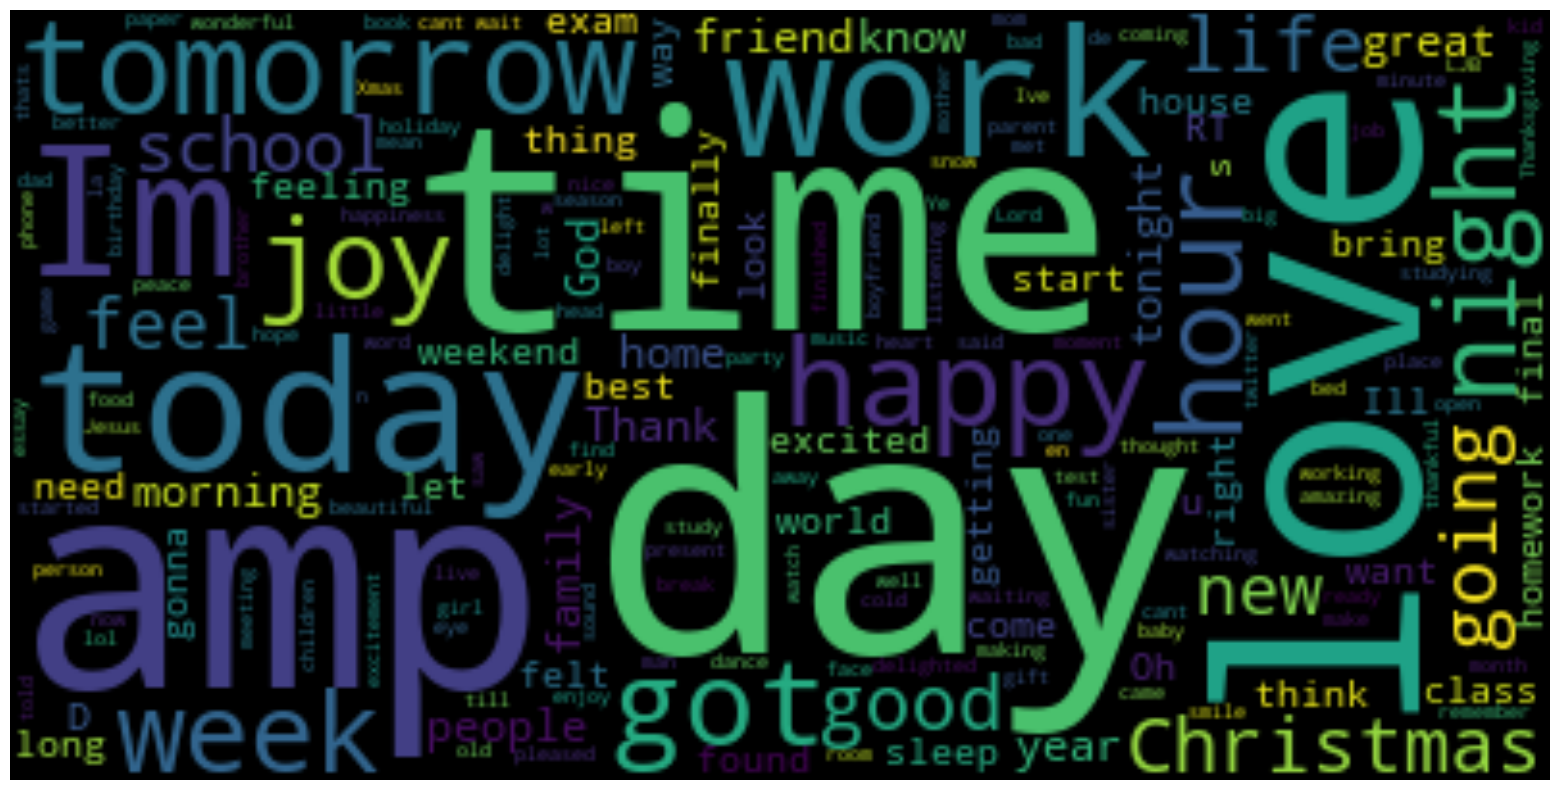

In [141]:
plot_wordcloud(joy_docx)

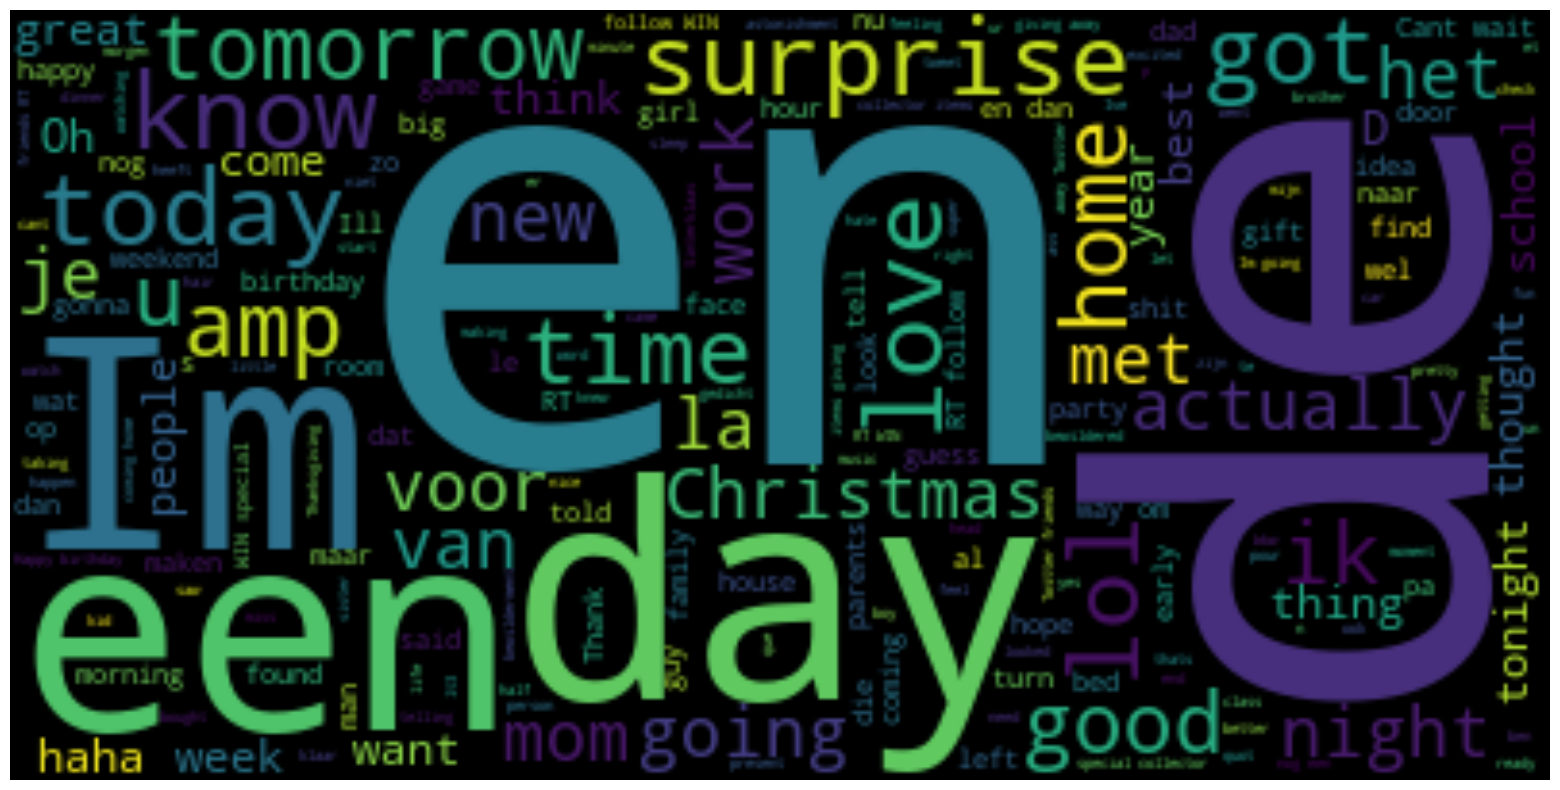

In [142]:
plot_wordcloud(surprise_docx)

### Machine Learning
+ Naive Bayes
+ LogisticRegression
+ KNN
+ DecisionTree


#### Compare with SparkNLP/NLU John Snows Lab

In [143]:
# Loading ML Packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [144]:
# Split the Dataset
from sklearn.model_selection import train_test_split

### Build Features From Our Test

In [145]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [146]:
Xfeatures

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Clean_Text, Length: 34792, dtype: object

In [147]:
# Vectorizer
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [148]:
# Get Features by Name
cv.get_feature_names_out()

array(['00', '000', '000ème', ..., 'ღƪ', 'ℕoíʀ', 'ㄒʜℰℳℰ'], dtype=object)

In [149]:
# Converting into Dense Array(Numpy)
X.toarray()
# Save the CountVectorizer object
joblib.dump(cv, "count_vectorizer.pkl")

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [150]:
# Splitting the Dataset 
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size= 0.3, random_state=42)

### Build Our Model

In [151]:
nv_model = MultinomialNB()
nv_model.fit(X_train, y_train)

MultinomialNB()

In [152]:
# Testing Accuracy of the Model
# Method 1
nv_model.score(X_test, y_test)

0.5642843456600881

In [153]:
# Predicitons
y_pred_for_nv = nv_model.predict(X_test)

In [154]:
y_pred_for_nv

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype='<U8')

### Make a Single Prediction
+ Vectorized our Text
+ Applied our Model

In [155]:
sample_text = ["Hari is good"]

In [156]:
vect = cv.transform(sample_text).toarray()

In [157]:
# Make Prediction
nv_model.predict(vect)

array(['joy'], dtype='<U8')

In [158]:
# Check for the Prediction Probability(Percentage)/Confidence Score
nv_model.predict_proba(vect)

array([[2.20742565e-02, 1.73669865e-03, 4.57988900e-02, 5.07148173e-01,
        6.92353730e-03, 1.59536889e-01, 1.77569174e-05, 2.56763798e-01]])

In [159]:
# Get all Class for our Model of the above top array
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [160]:
# Max Value by Training the Model by Prediction
np.max(nv_model.predict_proba(vect))

0.5071481733825433

In [161]:
def predict_emotion(sample_text, model):
    myvect = cv.transform(sample_text).toarray()
    prediction = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)
    pred_percentage_for_all = dict(zip(model.classes_, pred_proba[0]))
    print("Prediction: {}, Prediction Score: {}".format(prediction[0],np.max(pred_proba)))
    print(prediction[0])
    return pred_percentage_for_all

In [162]:
predict_emotion(sample_text, nv_model)

Prediction: joy, Prediction Score: 0.5071481733825433
joy


{'anger': 0.022074256526430112,
 'disgust': 0.0017366986538541935,
 'fear': 0.04579889002398783,
 'joy': 0.5071481733825433,
 'neutral': 0.006923537301015597,
 'sadness': 0.15953688915141145,
 'shame': 1.7756917402467572e-05,
 'surprise': 0.2567637980433535}

In [163]:
predict_emotion(["Arjun hates murali"],nv_model)

Prediction: sadness, Prediction Score: 0.4379294515175555
sadness


{'anger': 0.04716376111841693,
 'disgust': 0.0265312130508024,
 'fear': 0.05183968092684547,
 'joy': 0.306266555787013,
 'neutral': 0.038208658972701204,
 'sadness': 0.4379294515175555,
 'shame': 0.0028686329585002356,
 'surprise': 0.08919204566816467}

### Model Evaluation

In [164]:
# Classification Report
print(classification_report(y_test, y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.64      0.49      0.56      1283
     disgust       0.53      0.03      0.06       292
        fear       0.75      0.60      0.67      1645
         joy       0.51      0.86      0.64      3311
     neutral       0.30      0.02      0.04       675
     sadness       0.56      0.54      0.55      2015
       shame       1.00      0.03      0.05        36
    surprise       0.61      0.27      0.38      1181

    accuracy                           0.56     10438
   macro avg       0.61      0.36      0.37     10438
weighted avg       0.57      0.56      0.53     10438



In [165]:
# Making Confusion Matrix
confusion_matrix(y_test, y_pred_for_nv)

array([[ 633,    0,   58,  373,    7,  199,    0,   13],
       [  31,   10,   25,  132,    2,   81,    0,   11],
       [  79,    2,  984,  353,    4,  160,    0,   63],
       [  76,    1,  100, 2848,    9,  204,    0,   73],
       [  20,    0,   17,  550,   14,   71,    0,    3],
       [  89,    1,   74,  726,    7, 1080,    0,   38],
       [   9,    0,    7,   13,    0,    5,    1,    1],
       [  49,    5,   47,  621,    4,  135,    0,  320]], dtype=int64)

In [166]:
# Plot Confusion Matrix for Better Visualization(New Version of scikit-learn does not support this))
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(nv_model, X_test, y_test)

### Save Model

In [167]:
import joblib

In [168]:
model_file = open("emotion_Classifier_nv_model_21_february.pkl", "wb")
joblib.dump(nv_model, model_file)
model_file.close()

### Model Interpretation
+ Eli5(Needs LogisticRegression)
+ Lime
+ Shap

In [169]:
# Load the model from the file
model_file = open("emotion_Classifier_nv_model_21_february.pkl", 'rb')
loaded_model = joblib.load(model_file)
model_file.close()

# Sample text for prediction
sample_text = ["I hate children"]

# Vectorize the sample text
vect = cv.transform(sample_text).toarray()

# Make predictions with the loaded model
predictions = loaded_model.predict(vect)

# Print the predictions
print("Predicted Emotion:", predictions[0])

# Check for the Prediction Probability(Percentage)/Confidence Score
pred_proba = loaded_model.predict_proba(vect)
pred_percentage_for_all = dict(zip(loaded_model.classes_, pred_proba[0]))
print("Prediction Probability:", pred_percentage_for_all)

# Testing Accuracy of the Loaded Model
accuracy = loaded_model.score(X_test, y_test)
print("Testing Accuracy of the Loaded Model:", accuracy)

Predicted Emotion: sadness
Prediction Probability: {'anger': 0.2560061857442293, 'disgust': 0.015625861158137973, 'fear': 0.22128529703440994, 'joy': 0.23664337641661543, 'neutral': 0.002204910715811965, 'sadness': 0.25742640865814426, 'shame': 3.2437258402707714e-05, 'surprise': 0.010775523014247697}
Testing Accuracy of the Loaded Model: 0.5642843456600881
